## Mathematics in the Real World
### Midterm retake (afternoon) solutions
#### Prof. Jack Poulson; May 6, 2015

#### Problem 1
Given the dataset 
  $$ 10.5, 7, 2, -5, -20, 11, 12, 27, 30, $$
  
(a) **[25 pts]** Draw and label a box and whisker plot for the dataset.

(b) **[10 pts]** Compute the best estimates of the dataset with respect to the two-norm and max-norm.

After sorting the dataset from smallest to largest, we would find
  $$ -20, -5, 2, 7, 10.5, 11, 12, 27, 30, $$
which has median $10.5$, Lower Quartile $2$, Upper Quartile $12$, and therefore Interquartile Range $12-2=10$. Thus, any datapoints above $\text{UQ}+1.5*\text{IQR}=27$ or below $\text{LQ}-1.5*\text{IQR}=-13$ are considered outliars (i.e., 30 and -20). The whiskers respectively end at the largest datapoint (incluseively) between 12 and 27, which is 27, and the smallest datapoint between -13 and 2, which is -5. 

Alternatively, we can simply ask Python to draw the box plot for us:

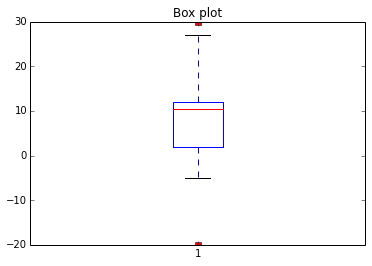

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

x = [10.5,7,2,-5,-20,11,12,27,30]

fig = plt.figure()
plt.boxplot(x, 
            notch=False, # box instead of notch shape 
            sym='rs',    # red squares for outliers
            vert=True)   # vertical box aligmnent
t = plt.title('Box plot')
plt.show()

The best two-norm estimate is the mean, which is
  $$ \frac{10.5+7+2-5-20+11+12+27+30}{9} \approx 8.2778, $$
while the best max-norm estimate is
  $$ \frac{-20+30}{2} = 5. $$

#### Problem 2
Consider a fair random walk:

(a) **[10 pts]** Write down the expected change in squared distance from zero if the walk is currently at position $k$ and takes one more step.

(b) **[10 pts]** Write down the expected change in (absolute) distance from zero if the walk is currently at position $k \neq 0$ and takes one more random step, and compute the expected change from taking a step at $k=0$.

(c) **[10 pts]** Describe the behaviour (as precisely as possible) of the Variance and Mean Absolute Deviation of the random walk as the number of steps increases.

For part (a), the question is to compute
  $$ E[(k+W_1)^2] - k^2, $$
where $W_1$ is one step of a random walk. We can easily evaluate this as
  $$ \left(\frac{1}{2}(k+1)^2 + \frac{1}{2}(k-1)^2\right) - k^2 = \frac{1}{2}\left( (k^2 + 2k + 1) + (k^2 - 2k + 1)\right) - k^2 = \frac{1}{2}\left( 2k^2 + 2 \right) - k^2 = 1.$$
  
For part (b), we seek to separately compute
  $$ E[|k+W_1|] - |k| $$
with $k \neq 0$ and $k = 0$. When $k \geq 1$, we find that, since $k-1$, $k$, and $k+1$ are all at least zero, that
  $$ \left(\frac{1}{2} | k+1 | + \frac{1}{2} | k - 1 | \right) - |k| = \left( \frac{1}{2} (k+1) + \frac{1}{2} (k-1) \right) - k = 0, $$
wherease, if $k \leq 1$, we find that $k-1$, $k$, and $k+1$ are all at most zero, so that
  $$ \left(\frac{1}{2} | k+1 | + \frac{1}{2} | k - 1 | \right) - |k| = \left( -\frac{1}{2} (k+1) - \frac{1}{2} (k-1) \right) + k = 0. $$
Thus, as long as $k \neq 0$, we have that the expected change in the absolute distance from zero is zero. But, if $k=0$, then we will have that $k+1$ is positive while $k-1$ is negative, and thus
  $$ \left(\frac{1}{2} |k+1| + \frac{1}{2} |k-1| \right) - |k| = \left( \frac{1}{2} 1 + \frac{1}{2} 1 \right) - 0 = 1. $$
  
For part (c), part (a) allows us to conclude that every step of the random walk must increase the variance by $1$ since, regardless of where each walk is, its next step will, on average, increase the squared distance from zero by one (and the variance is nothing but the average squared distance from zero). Likewise, part (b) allows us to recognize that the Mean Absolute Deviation from step $n$ to step $n+1$ can be expressed as
  $$ \text{MAD}[W_{n+1}] = \text{MAD}[W_n] + P[W_n=0]*1, $$
since each walk that is at zero after $n$ steps will lead to an average increase of one in its absolute distance from zero after one more step. Since it is not possible for an odd number of steps to have ended at zero, we have that the probability that $n$ steps of the random walk ends at zero, $P[W_n=0]$, is zero. But, for even numbers of steps, there are $2^n$ total unique paths, and $\binom{n}{n/2}$ of them will end at zero, and so the $P[W_n=0]=\binom{n}{n/2} 2^{-n}$ when $n$ is even.

#### Problem 3
Consider a random walk where the first step is twice as likely to be backward as forward, but subsequent steps prefer to go in the **opposite** direction as the preceding step by a factor of two. For example, if the first step was forward, the odds of the next step being backward are $2/3$. But, if the first step was forward and the second step was backward, then the odds of the third step being forward are $2/3$. If the random walk is allowed to continue for **three steps**:

(a) **[5 pts]** List the possible final locations.

(b) **[10 pts]** Compute the likelihoods of these locations.

(c) **[5 pts]** Compute the expected location.

(d) **[15 pts]** Compute the variance, standard deviation, and Mean Absolute Deviation.

The different possible random walks and their probabilities are:

* FFF ends at 3 and has likelihood $(1/3)(1/3)(1/3)=1/27.$
* FFB ends at 1 and has likelihood $(1/3)(1/3)(2/3)=2/27.$
* FBF ends at 1 and has likelihood $(1/3)(2/3)(2/3)=4/27.$
* FBB ends at -1 and has likelihood $(1/3)(2/3)(1/3)=2/27.$
* BFF ends at 1 and has likelihood $(2/3)(2/3)(1/3)=4/27.$
* BFB ends at -1 and has likelihood $(2/3)(2/3)(2/3)=8/27.$
* BBF ends at -1 and has likelihood $(2/3)(1/3)(2/3)=4/27.$
* BBB ends at -3 and has likelihood $(2/3)(1/3)(1/3)=2/27.$

Thus, the answer to (a) is the set of locations $(-3,-1,1,3)$, and their likelihoods, for part (b), are respectively

* 3 has likelihood $1/27$,
* 1 has likelihood $2/27 + 4/27 + 4/27 = 10/27$,
* -1 has likelihood $2/27 + 8/27 + 4/27 = 14/27$, and
* -3 has likelihood $2/27$.

For part (c), the expected final location is then
  $$ E[W_3] = \frac{1}{27}*(3) + \frac{10}{27}*(1) + \frac{14}{27}*(-1) + \frac{2}{27}*(-3) = \frac{-7}{27}. $$
For part (d), the variance is then
  $$ \begin{eqnarray*} \text{Var}[W_3] &=& E[(W_3-E[W_3])^2] = E[(W_3+\frac{7}{27})^2] \\
      &=& \frac{1}{27}*(3+\frac{7}{27})^2 + \frac{10}{27}*(1+\frac{7}{27})^2 + \frac{14}{27}*(-1+\frac{7}{27})^2 + \frac{2}{27}*(-3+\frac{7}{27})^2 \\
      &\approx& 1.8217, \end{eqnarray*} $$
and the standard deviation is the square-root of the variance, roughly $1.3497$.
Likewise, the Mean Absolute Deviation is
  $$ \begin{eqnarray*}\text{MAD}[W_3] &=& E[|W_3 - E[W_3]|] = E[|W_3 + \frac{7}{27}|] \\
     &=& \frac{1}{27}*|3+\frac{7}{27}| + \frac{10}{27}*|1+\frac{7}{27}| + \frac{14}{27}*|-1+\frac{7}{27}| + \frac{2}{27}*|-3+\frac{7}{27}| \\
     &\approx& 1.174.\end{eqnarray*} $$